**Puente Viga Losa**

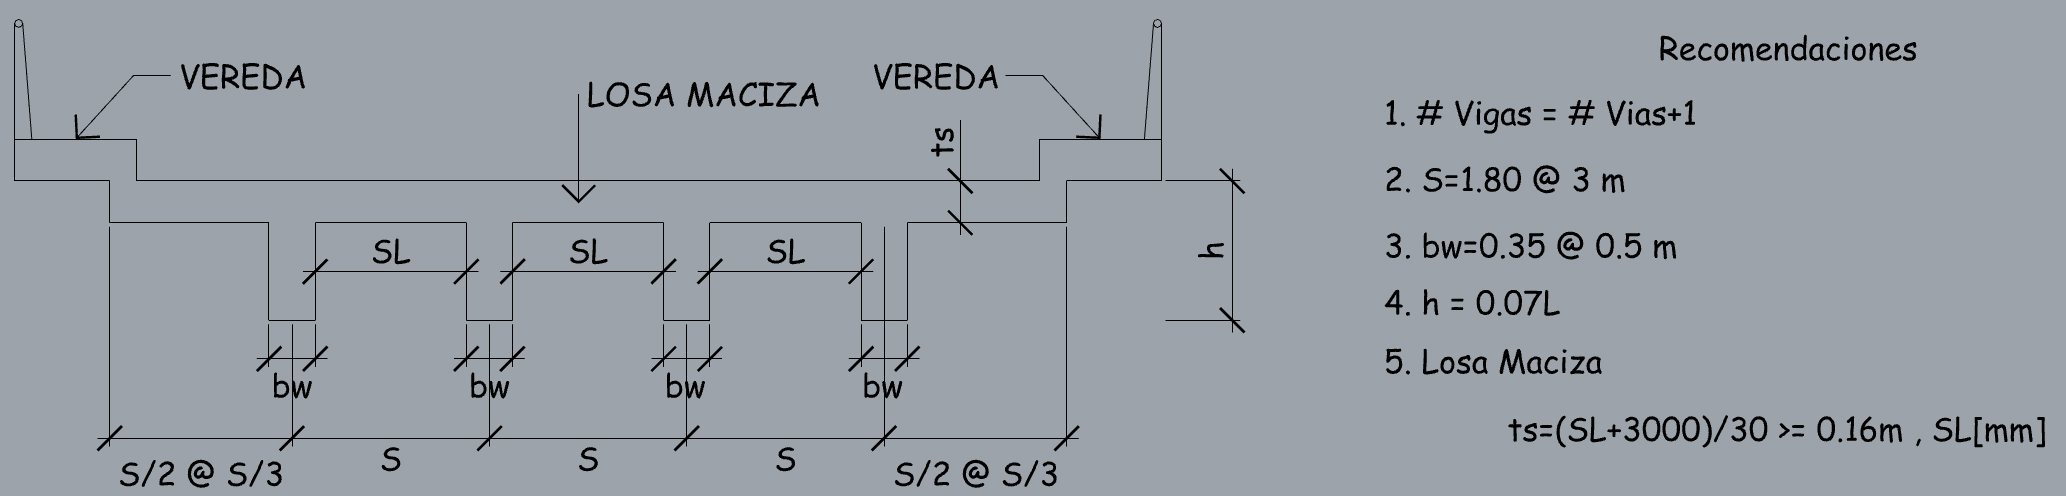

Datos Iniciales:
- Luz del Puente = 15 m
- Sobrecargas
  - Trafico de Bicicletas
    - sc_b = 440 kgf/m2
  - Trafico de Peatones
    - sc_p = 367 kgf/m2
- Baranda
  - Peso Propio
    - pb = 160 kgf/m
Propiedades Mecanicas:
- Densidad
  - Concreto = 2.5 tnf/m3
  - Asfalto = 2.2  tnf/m3
- Concreto
  - Resistencia a Compresion
    - fc = 280 kgf/cm2 (Minimo segun Norma)
  - Modulo de Elasticidad
    - E = 15000*$\sqrt{fc}$ kgf/cm2
- Acero
  - Modulo de Elasticidad
    - E = 2000000 kgf/cm2

*Ejemplo*

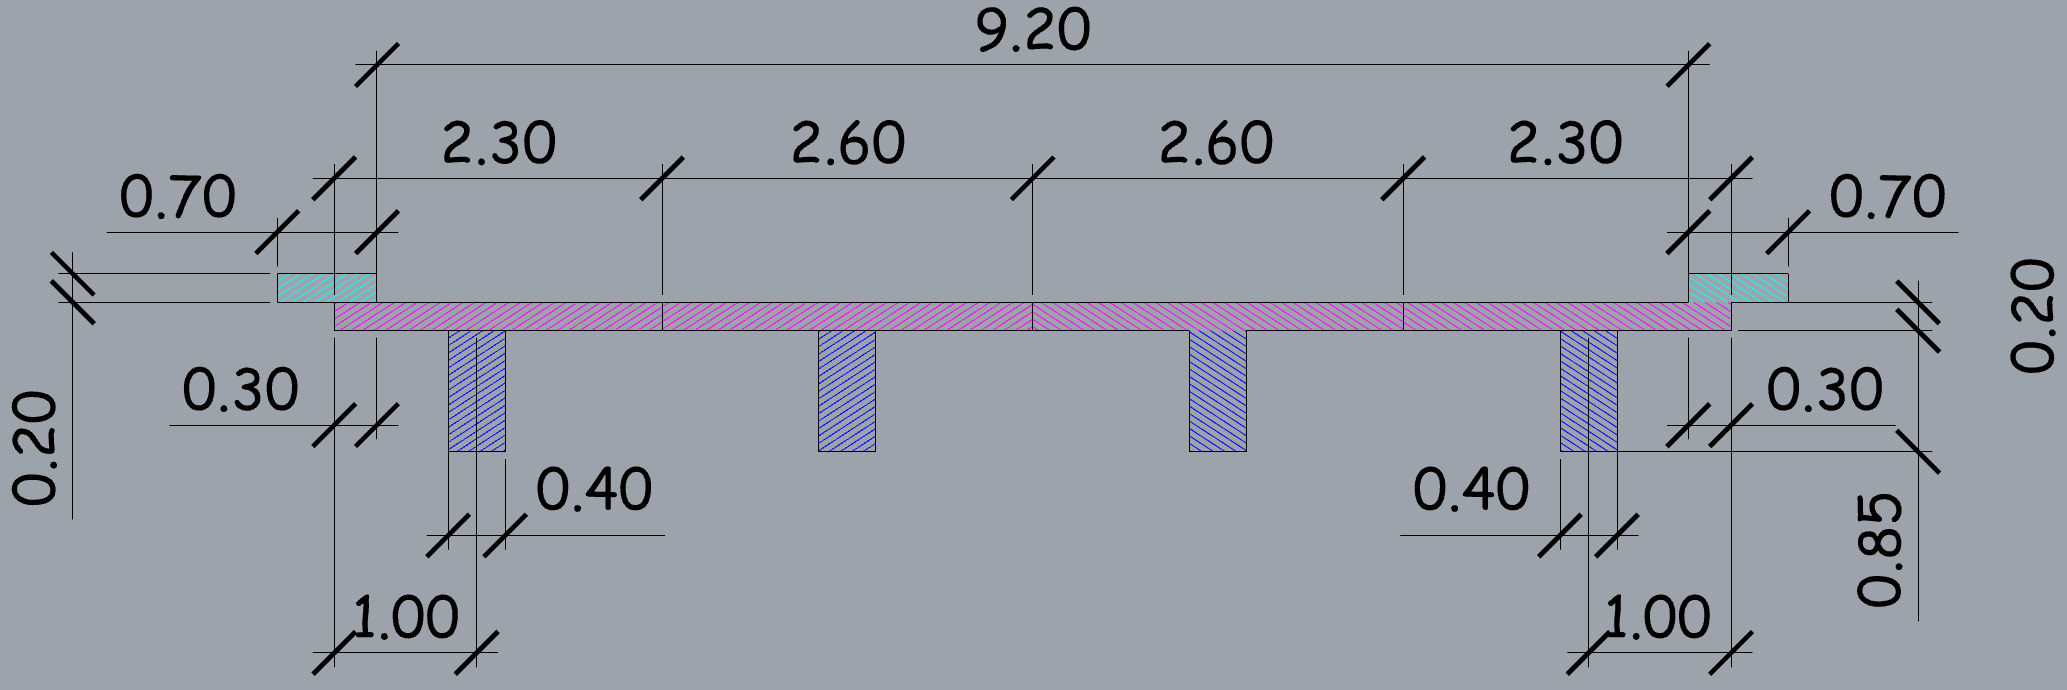

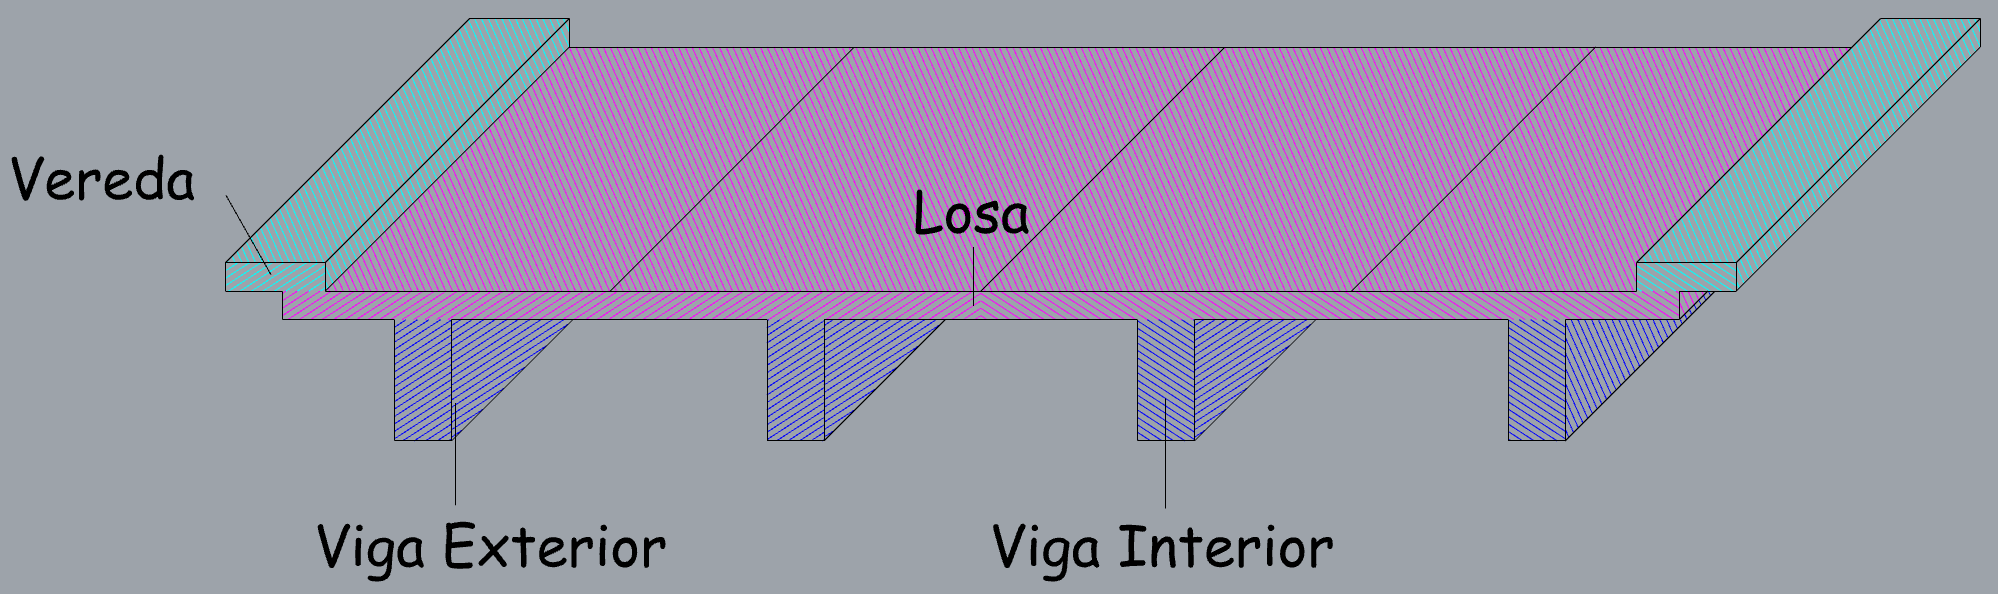

In [1]:
# Propiedades Generales para Diseño Estructural

# Resistencia de los Materiales

# Concreto
fc = 280  # Resistencia del Concreto (kgf/cm2)
Ec = 5000*(fc)**0.5  # Modulo de Elasticidad del Concreto (kgf/cm2)
Et = 2*fc**0.5  # Esfuerzo de Traccion (kgf/cm2)

# Acero
fy = 4200  # Resistencia del Acero (kgf/cm2)
Ea = 2*10**6  # Modulo de Elasticidad del Acero (kgf/cm2)

# Densidad de los Materiales
dc = 2.5  # Densidad del Concreto (tn/m3)
dv = 2.4  # Densidad de la Vereda (tn/m3)
da = 2.2  # Densidad del Asfalto (tn/m3)

# Cargas
cb = 0.160  # Baranda (tnf/m)
cp = 0.367  # Peatonal (tnf/m2)

# Consideraciones
E_s = Ec  # Modulo de Elasticidad de la Losa (kgf/cm2)
E_b = E_s  # Modulo de El. Viga = Modulo de El. Losa

In [1]:
# Datos Iniciales
lz = 28  # Luz del Puente (m)
lv = 0.70 # Longitud de la Vereda (m)
gg=0.3 # Grosor de la Garganta (m)
ev=0.2 # Espesor de la Vereda (m)

In [3]:
h = 0.07*lz  # (m)
bw = 0.40  # (m)
sl = 2.2  # (m)
s=sl+bw # (m)
ts = (sl+3)/3  # (m)
print ('h='+str(round(h, 2))+'m')
print ('bw='+str(round(bw, 2))+'m')
print ('sl='+str(round(sl, 2))+'m')
print ('s='+str(round(s, 2))+'m')
print ('ts='+str(round(ts, 2))+'m')
print('Escoger un espesor ts ...')

h=1.05m
bw=0.4m
sl=2.2m
s=2.6m
ts=1.73m
Escoger un espesor ts ...


In [4]:
# Escoger un ts
ts=0.20 # (m)

**ANALISIS ESTRUCTURAL**

*Camino de Diseño, Tandem, Carga Distribuida*

Obs. *Los momentos y cortantes que se calcularan son por VIA*

**Camion de Diseño**

In [2]:
from sympy import *

r1, r2, m = symbols('r1 r2 m')
r2 = (14.8*(lz-4.3)+3.6*(lz/2+4.3))/lz
r1 = solve(Eq(r1+r2, 14.8*2+3.6), r1)
r1 = r1[0]

m = solve(Eq(-r1*lz/2+m+14.8*4.3, 0), m)
m_c = m[0]

# Momento Maximo
print('Momento Maximo (tnf-m) =', round(m_c, 2))

r1, r2, m = symbols('r1 r2 m')
r2 = (14.8*4.3+3.6*8.6)/lz
r1 = solve(Eq(r1+r2, 14.8*2+3.6), r1)
r1_c = r1[0]

# Cortante Maximo
print('Cortante Maximo (tnf) =', round(r1_c, 2))

Momento Maximo (tnf-m) = 192.84
Cortante Maximo (tnf) = 29.82


**Tandem**

In [3]:
r1, r2, m = symbols('r1 r2 m')
r2 = (11.4*lz/2+11.4*(lz/2+1.2))/lz
r1 = solve(Eq(r1+r2, 11.4*2), r1)
r1 = r1[0]

m = solve(Eq(-r1*lz/2+m, 0), m)
m_t = m[0]

# Momento Maximo
print('Momento Maximo (tnf-m) =', round(m_t, 2))

r1, r2, m = symbols('r1 r2 m')
r2 = (11.4*1.2)/lz
r1 = solve(Eq(r1+r2, 11.4*2), r1)
r1_t = r1[0]

# Cortante Maximo
print('Cortante Maximo (tnf) =', round(r1_t, 2))

Momento Maximo (tnf-m) = 152.76
Cortante Maximo (tnf) = 22.31


**Carga Distribuida**

In [4]:
cv = 0.96  # Carga Distribuida (tnf-m)
m_cv = cv*lz**2/8
print('Momento Maximo (tnf-m) =', round(m_cv, 2))
r1_cv = cv*lz/2
print('Cortante Maximo (tnf) =', round(r1_cv, 2))

Momento Maximo (tnf-m) = 94.08
Cortante Maximo (tnf) = 13.44


---

**Resumen (Momentos Flectores)**

In [5]:
Data_1=[round(m_c,2),round(m_t,2),round(max(m_c,m_t),2),round(max(m_c,m_t)+m_cv,2),round(max(m_c,m_t)*0.33,2)]
Data_1

[192.84, 152.76, 192.84, 286.92, 63.64]

**Resumen (Cortantes)**

In [7]:
Data_2=[round(r1_c,2),round(r1_t,2),round(max(r1_c,r1_t),2),round(max(r1_c,r1_t)+r1_cv,2),round(max(r1_c,r1_t)*0.33,2)]
Data_2

[29.82, 22.31, 29.82, 43.26, 9.84]

Nota: El orden para la obtencion del *RESUMEN* de los momentos flectores y cortantes es el siguiente:
1. Camion de Diseño
2. Tandem
3. Maxima Carga
4. Maxima Carga + Carga Distribuida (Carga Viva) : LL
5. Carga de Impacto : IM

***Todos estos calculos son realizados por via***

---

**Calculo del Ancho Efectivo en Vigas**

*Viga Interior*

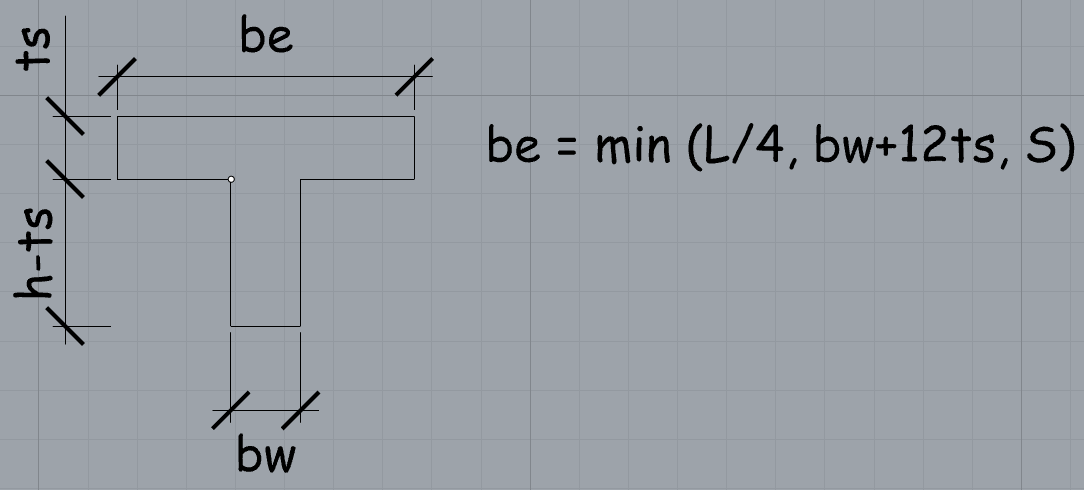

In [10]:
be_vi=min(lz/4,bw+12*ts,s)
print ('be_vi='+str(round(be_vi, 2))+'m')

be_vi=2.6m


*Viga Exterior*

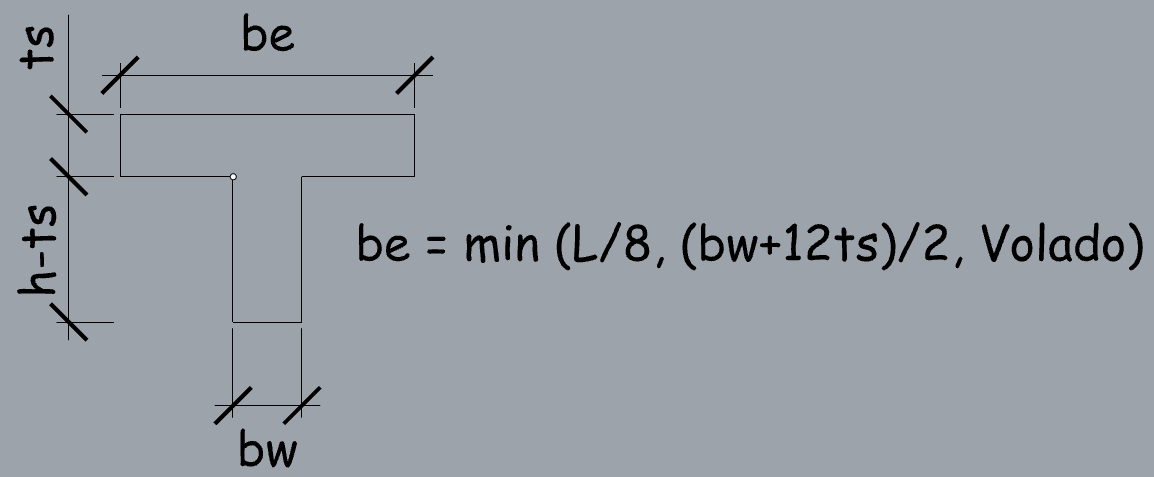

In [11]:
vld=1 # Volado (m)
be_ve = be_vi/2+min(lz/8, (bw+12*ts)/2,vld)
print('be_ve='+str(round(be_ve, 2))+'m')

be_ve=2.3m


In [12]:
n_b_e = 2  # Numero de Vigas Exteriores
n_b_i = 2  # Numero de Vigas Interiores
l_via = n_b_e*be_ve+n_b_i*be_vi-2*gg  # Longitud de la Via (m)
print('l_via='+str(round(l_via, 2))+' m')

l_via=9.2 m


---

**Momentos en Vigas Interiores y Exteriores**

*Viga Interior*

In [13]:
print ('s='+str(round(s, 2))+'m')
print ('ts='+str(round(ts, 2))+'m')
print ('lz='+str(round(lz, 2))+'m')

s=2.6m
ts=0.2m
lz=15m


Restricciones (m) :
- $1.1<s<4.9$
- $0.11<ts<0.30$
- $6<lz<73$

In [14]:
# Centro de Gravedad de una Viga T
A1=be_vi*ts
A2=bw*(h-ts)
A=A1+A2
cg=((h-ts/2)*A1+((h-ts)/2)*A2)/(sum([A1,A2]))
print ('cg='+str(round(cg, 2))+' m')

# Momento de Inercia de una Viga T
I1=be_vi*ts**3/12
I2=bw*(h-ts)**3/12
y1=(h-ts/2-cg)
y2=((h-ts)/2-cg)
I=I1+A1*y1**2+I2+A2*y2**2
print ('I='+str(round(I, 3))+' m4')

cg=0.74 m
I=0.079 m4


In [15]:
n=E_b/E_s
eg=h-ts/2-cg
kg = n*(I+A*eg**2)
g_int_m=0.075+(s/2.9)**.6*(s/lz)**.2*(kg/(lz*ts**3))**.1
print ('g_int_m='+str(round(g_int_m, 3))+' [%]')

g_int_m=0.732 [%]


In [16]:
M_LL_vi=g_int_m*Data_1[3]
M_IM_vi=g_int_m*Data_1[4]
print ('M_LL_vi='+str(round(M_LL_vi, 2))+' tnf-m')
print ('M_IM_vi='+str(round(M_IM_vi, 2))+' tnf-m')

M_LL_vi=81.98 tnf-m
M_IM_vi=20.53 tnf-m


*Viga Exterior*

In [17]:
de=vld-gg
e=0.77+de/2.8
print ('de='+str(round(de, 2))+' m')
print ('e='+str(round(e, 2))+' m')

de=0.7 m
e=1.02 m


Restriccion del valor *de* (m):
- $0.30<de<1.7$

In [18]:
g_ext_m=g_int_m*e
print ('g_ext_m='+str(round(g_ext_m, 3))+' [%]')

g_ext_m=0.747 [%]


In [19]:
M_LL_ve=g_ext_m*Data_1[3]
M_IM_ve=g_ext_m*Data_1[4]
print ('M_LL_ve='+str(round(M_LL_ve, 2))+' tnf-m')
print ('M_IM_ve='+str(round(M_IM_ve, 2))+' tnf-m')

M_LL_ve=83.62 tnf-m
M_IM_ve=20.94 tnf-m


---

**Cortantes en Vigas Interiores y Exteriores**

*Viga Interior*

In [20]:
g_int_c = 0.2+s/3.6-(s/10.7)**2
print ('g_int_c='+str(round(g_int_c, 3))+' [%]')

g_int_c=0.863 [%]


In [21]:
V_LL_vi=g_int_c*Data_2[3]
V_IM_vi=g_int_c*Data_2[4]
print ('V_LL_vi='+str(round(V_LL_vi, 2))+' tnf')
print ('V_IM_vi='+str(round(V_IM_vi, 2))+' tnf')

V_LL_vi=29.43 tnf
V_IM_vi=7.66 tnf


*Viga Exterior*

In [22]:
e=0.6+de/3
print ('e='+str(round(e, 2))+' m')

e=0.83 m


In [23]:
g_ext_c = e*g_int_c
print ('g_ext_c='+str(round(g_ext_c, 3))+' [%]')

g_ext_c=0.719 [%]


In [24]:
V_LL_ve=g_ext_c*Data_2[3]
V_IM_ve=g_ext_c*Data_2[4]
print ('V_LL_ve='+str(round(V_LL_ve, 2))+' tnf')
print ('V_IM_ve='+str(round(V_IM_ve, 2))+' tnf')

V_LL_ve=24.52 tnf
V_IM_ve=6.38 tnf


---

**Momentos DC (Estructural)**

*Viga Interior*

In [25]:
w_s=dc*be_vi*ts
w_b=dc*bw*(h-ts)
M_dc_vi=sum([w_s,w_b])*lz**2/8
V_dc_vi=sum([w_s,w_b])*lz/2
print ('M_dc_vi='+str(round(M_dc_vi, 2))+' tnf-m')
print ('V_dc_vi='+str(round(V_dc_vi, 2))+' tnf')

M_dc_vi=60.47 tnf-m
V_dc_vi=16.13 tnf


*Viga Exterior*

In [26]:
w_s=dc*be_ve*ts
w_b=dc*bw*(h-ts)
M_dc_ve=sum([w_s,w_b])*lz**2/8
V_dc_ve=sum([w_s,w_b])*lz/2
print ('M_dc_ve='+str(round(M_dc_ve, 2))+' tnf-m')
print ('V_dc_ve='+str(round(V_dc_ve, 2))+' tnf')

M_dc_ve=56.25 tnf-m
V_dc_ve=15.0 tnf


**Momentos DW (No Estructural)**

*Viga Interior*

In [27]:
w_a=da*be_vi*0.10 # 10 cm = 0.10 m de Asfalto
M_dw_vi=w_a*lz**2/8
V_dw_vi=w_a*lz/2
print ('M_dw_vi='+str(round(M_dw_vi, 2))+' tnf-m')
print ('V_dw_vi='+str(round(V_dw_vi, 2))+' tnf')

M_dw_vi=16.09 tnf-m
V_dw_vi=4.29 tnf


*Viga Exterior*

In [28]:
w_a = da*(be_ve-gg)*0.10  # 10 cm = 0.10 m de Asfalto (tnf-m)
w_v = dv*lv*ev  # Vereda (tnf-m)
w_b = cb  # Baranda (tnf-m)
M_dw_ve = sum([w_a, w_v, w_b])*lz**2/8
V_dw_ve = sum([w_a, w_v, w_b])*lz/2
print('M_dw_ve='+str(round(M_dw_ve, 2))+' tnf-m')
print('V_dw_ve='+str(round(V_dw_ve, 2))+' tnf')

M_dw_ve=26.32 tnf-m
V_dw_ve=7.02 tnf


*Carga Peatonal*

In [29]:
w_p=cp*lv
M_p=w_p*lz**2/8
V_p=w_p*lz/2
print ('M_p='+str(round(M_p, 2))+' tnf-m')
print ('V_p='+str(round(V_p, 2))+' tnf')

M_p=7.23 tnf-m
V_p=1.93 tnf


---

*Resumen de Momentos y Cortantes en Vigas Interiores y Exteriores*

El Resumen tiene el siguiente orden:
- Factor de Momentos
- Factor de Cortantes
- Momentos en Vigas
    - Viva
    - Impacto
- Cortantes en Vigas
    - Viva
    - Impacto
- Momento DC
- Cortante DC
- Momento DW
- Cortante DW
- Momento Peatonal **
- Cortante Peatonal **

** Solo para Vigas Exteriores

*Viga Exterior*

In [30]:
Data_3=[round(g_ext_m,2),round(g_ext_c,2),round(M_LL_ve,2),round(M_IM_ve,2),round(V_LL_ve,2),round(V_IM_ve,2),round(M_dc_ve,2),round(V_dc_ve,2),round(M_dw_ve,2),round(V_dw_ve,2),round(M_p,2),round(V_p,2)]
Data_3

[0.75, 0.72, 83.62, 20.94, 24.52, 6.38, 56.25, 15.0, 26.32, 7.02, 7.23, 1.93]

*Viga Interior*

In [31]:
Data_4=[round(g_int_m,2),round(g_int_c,2),round(M_LL_vi,2),round(M_IM_vi,2),round(V_LL_vi,2),round(V_IM_vi,2),round(M_dc_vi,2),round(V_dc_vi,2),round(M_dw_vi,2),round(V_dw_vi,2)]
Data_4

[0.73, 0.86, 81.98, 20.53, 29.43, 7.66, 60.47, 16.13, 16.09, 4.29]

---

**DISEÑO ESTRUCTURAL**

**Flexion**

Cuantia Minima:
- Vigas
  - $\rho_{min} = 0.002$
  - $A_{min} = \rho_{min}*b*d$

*Viga Interior*

In [32]:
phi_f = 0.9  # Factor de Reduccion
d = h*100-15  # Peralte Efectivo (cm) 2 Capas = 15 cm

Mu_vi = 1.25*Data_4[6]+1.5*Data_4[8]+1.75*(Data_4[2]+Data_4[3]) # Momento Ultimo (tnf-m)
ku = Mu_vi*10**5/(phi_f*(be_vi*100)*d**2)  # Factor ku
m = fy/(0.85*fc)  # Factor m
rho = 1/m*(1-(1-2*m*(ku/fy))**0.5)  # Factor rho
As_vi = rho*(be_vi*100)*d  # Area de Acero (cm2)
a = As_vi*fy/(0.85*fc*(be_vi*100))  # Valor a (cm)
c = a/0.85  # Valor c (cm)

if c<20:
    print ('Se diseña como Viga Rectangular :: '+str(round(c,2))+' < 20 cm')
else:
    print ('Se diseña como Viga T :: '+str(round(c,2))+' > 20 cm')
    
if c/d < 0.42:
    print('Falla Ductil :: c/d = ' + str(round(c/d, 2))+ ' < 0.42')
else:
    print ('Falla Fragil :: c/d = ' + str(round(c/d,2))+ ' > 0.42')

Se diseña como Viga Rectangular :: 6.77 < 20 cm
Falla Ductil :: c/d = 0.08 < 0.42


In [33]:
# Diseño de Viga :: Parte Superior

rec=7.5 # Recubrimiento (cm)
rho_min = 0.002  # Cuantia Minima de Acero para Vigas
As_min_vi = rho_min*(bw*100)*(h*100-rec)  # Area de Acero Minima (cm2)
print('As_min_vi = '+str(round(As_min_vi, 2))+' cm2 '+'(Superior)')
print ('Escoger un Area de Acero As ...')

As_min_vi = 7.8 cm2 (Superior)
Escoger un Area de Acero As ...


In [34]:
n = 4  # Cantidad de Barras de Acero
diam = 1  # Diametro de la Barra (in)
As_sup_vi = pi*(diam*2.54)**2/4  # Area de la Barra (cm2)
print ('Area As (cm2) = '+str(round(n*As_sup_vi, 2)) + ' cm2 '+':: '+str(n) + '#'+str(diam)+' (Superior)')

Area As (cm2) = 20.27 cm2 :: 4#1 (Superior)


In [35]:
# Calculo de Acero :: Parte Inferior

n = 18 # Cantidad de Barras de Acero
diam = 1  # Diametro de la Barra (in)
As_req_vi = pi*(diam*2.54)**2/4  # Area de la Barra (cm2)
print ('Area As (cm2) = '+str(round(As_vi,2))+ ' cm2 '+' (Requerido)')
print ('Area As (cm2) = '+str(round(n*As_req_vi,2))+ ' cm2 '+':: '+str(n)+ '#'+str(diam)+' (Escogido)')

Area As (cm2) = 84.75 cm2  (Requerido)
Area As (cm2) = 91.21 cm2 :: 18#1 (Escogido)


In [36]:
# Acero Adicional

n = 6  # Cantidad de Barras de Acero
diam = 3/4  # Diametro de la Barra (in)
As_ad_vi = pi*(diam*2.54)**2/4  # Area de la Barra (cm2)
print ('Area As (cm2) = '+str(round(n*As_ad_vi,2))+ ' cm2 '+':: '+str(n)+ '#'+str(diam)+' (Adicional)')

Area As (cm2) = 17.10 cm2 :: 6#0.75 (Adicional)


In [37]:
# Area de Acero Total
As_tot_vi = As_sup_vi+As_vi+As_ad_vi
print('Area As (cm2) = '+str(round(As_vi, 2)) + ' cm2 '+' (Requerido)')
print ('Area As (cm2) = '+str(round(As_tot_vi,2))+ ' cm2 '+' (Total)')

Area As (cm2) = 84.75 cm2  (Requerido)
Area As (cm2) = 92.67 cm2  (Total)


**Corte**

In [38]:
phi_c = 0.85 # Factor de Reduccion para Cortante

Vu_vi = 1.25*Data_4[7]+1.5*Data_4[9]+1.75*(Data_4[4]+Data_4[5]) # Cortante Ultimo (tnf)
Vc_vi = 0.53*fc**.5*(bw*100)*d # Cortante Nominal (kgf)
Vs_vi = Vu_vi*1000/phi_c-Vc_vi # Cortante de Estribo Requerido(kgf)

# Acero de Estribo
diam = 3/8  # Diametro de la Barra (in)
A_diam = pi*(diam*2.54)**2/4

n = 2 # Cantidad de Barras de Acero o Ramales
Av_vi = n*A_diam

# Espaciamiento de Estribos
s_vi = Av_vi*fy*d/(Vs_vi)
print ('s_vi = '+str(round(s_vi,2))+ ' cm '+':: '+'Av = '+str(round(Av_vi,2))+' cm2')
print ('Escoger un espaciamiento s_vi ...')

s_vi = 7.11 cm :: Av = 1.43 cm2
Escoger un espaciamiento s_vi ...


In [56]:
s_vi=5 # cm

Especificaciones:

- Usar 2 Estribos $\phi$ 3/8" :: 5 @ 0.05 , 18 @ 0.10 y rsto. @ 0.25

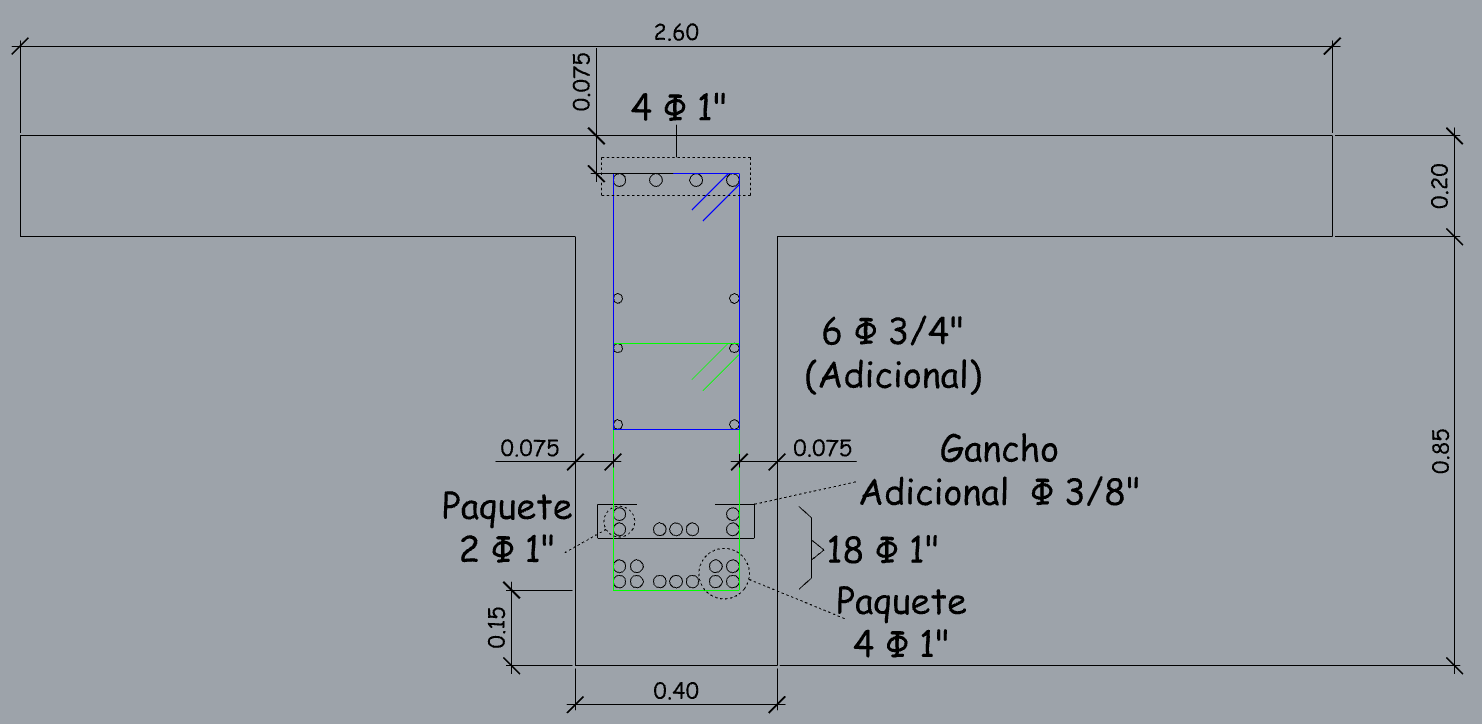

---

*Viga Exterior*

In [40]:
phi_f = 0.9  # Factor de Reduccion para Flexion
d = h*100-15  # Peralte Efectivo (cm) 2 Capas = 15 cm

Mu_ve = 1.25*Data_3[6]+1.5*Data_3[8]+1.75*(Data_3[2]+Data_3[3]+Data_3[10]) # Momento Ultimo (tnf-m)
ku = Mu_ve*10**5/(phi_f*(be_ve*100)*d**2)  # Factor ku
m = fy/(0.85*fc)  # Factor m
rho = 1/m*(1-(1-2*m*(ku/fy))**0.5)  # Factor rho
As_ve = rho*(be_ve*100)*d  # Area de Acero (cm2)
a = As_ve*fy/(0.85*fc*(be_ve*100))  # Valor a (cm)
c = a/0.85  # Valor c (cm)

if c<20:
    print ('Se diseña como Viga Rectangular :: '+str(round(c,2))+' < 20 cm')
else:
    print ('Se diseña como Viga T :: '+str(round(c,2))+' > 20 cm')
    
if c/d < 0.42:
    print('Falla Ductil :: c/d = ' + str(round(c/d, 2))+ ' < 0.42')
else:
    print ('Falla Fragil :: c/d = ' + str(round(c/d,2))+ ' > 0.42')

Se diseña como Viga Rectangular :: 8.44 < 20 cm
Falla Ductil :: c/d = 0.09 < 0.42


In [41]:
# Diseño de Viga :: Parte Superior

rec = 7.5  # Recubrimiento (cm)
rho_min = 0.002  # Cuantia Minima de Acero para Vigas
As_min_ve = rho_min*(bw*100)*(h*100-rec)  # Area de Acero Minima (cm2)
print('As_min_ve = '+str(round(As_min_ve, 2))+' cm2 '+'(Superior)')
print('Escoger un Area de Acero As ...')

As_min_ve = 7.8 cm2 (Superior)
Escoger un Area de Acero As ...


In [42]:
n = 4  # Cantidad de Barras de Acero
diam = 1  # Diametro de la Barra (in)
As_sup_ve = pi*(diam*2.54)**2/4  # Area de la Barra (cm2)
print ('Area As (cm2) = '+str(round(n*As_sup_ve, 2)) + ' cm2 '+':: '+str(n) + '#'+str(diam)+' (Superior)')

Area As (cm2) = 20.27 cm2 :: 4#1 (Superior)


In [43]:
# Calculo de Acero :: Parte Inferior

n = 19  # Cantidad de Barras de Acero
diam = 1  # Diametro de la Barra (in)
As_req_ve = pi*(diam*2.54)**2/4  # Area de la Barra (cm2)
print('Area As (cm2) = '+str(round(As_ve, 2)) + ' cm2 '+' (Requerido)')
print ('Area As (cm2) = '+str(round(n*As_req_ve,2)) + ' cm2 '+':: '+str(n) + '#'+str(diam)+' (Escogido)')

Area As (cm2) = 93.51 cm2  (Requerido)
Area As (cm2) = 96.27 cm2 :: 19#1 (Escogido)


**Corte**

In [44]:
phi_c = 0.85 # Factor de Reduccion para Cortante

Vu_ve = 1.25*Data_3[7]+1.5*Data_3[9]+1.75*(Data_3[4]+Data_3[5]+Data_3[11]) # Cortante Ultimo (tnf)
Vc_ve = 0.53*fc**.5*(bw*100)*d # Cortante Nominal (kgf)
Vs_ve = Vu_ve*1000/phi_c-Vc_ve # Cortante de Estribo Requerido(kgf)

# Acero de Estribo
diam = 3/8  # Diametro de la Barra (in)
A_diam = pi*(diam*2.54)**2/4

n = 2 # Cantidad de Barras de Acero o Ramales
Av_ve = n*A_diam

# Espaciamiento de Estribos
s_ve = Av_ve*fy*d/(Vs_ve)
print ('s_ve = '+str(round(s_ve,2))+ ' cm '+':: '+'Av = '+str(round(Av_ve,2))+' cm2')
print ('Escoger un espaciamiento s_ve ...')

s_ve = 7.68 cm :: Av = 1.43 cm2
Escoger un espaciamiento s_ve ...


In [57]:
s_ve = 7.5 # cm

Especificaciones:

- Usar 2 Estribos $\phi$ 3/8" :: 5 @ 0.075 , 18 @ 0.10 y rsto. @ 0.25

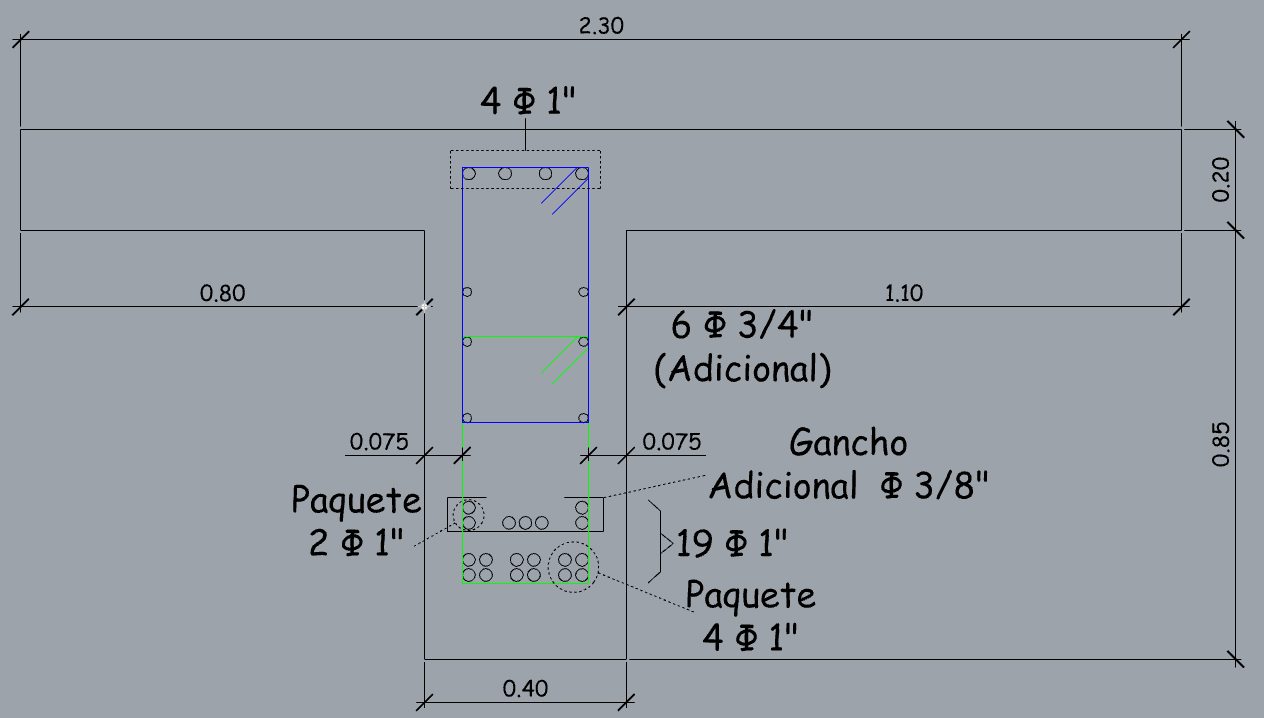

**Nota: El volado se escoge !!**

---

**DISEÑO DE LA LOSA PERPENDICULAR A LAS VIGAS (TRAFICO)**

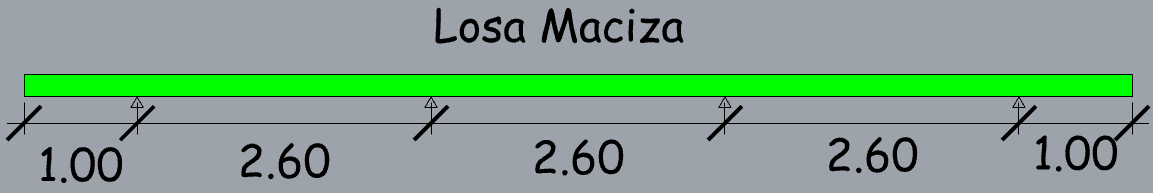

*Carga DC (Carga Estructural)*

In [46]:
w_sl_dc=dc*ts*1 # 1m de Ancho de la Losa (slab)
print ('w_sl_dc='+str(round(w_sl_dc,2))+' tnf/m')

w_sl_dc=0.5 tnf/m


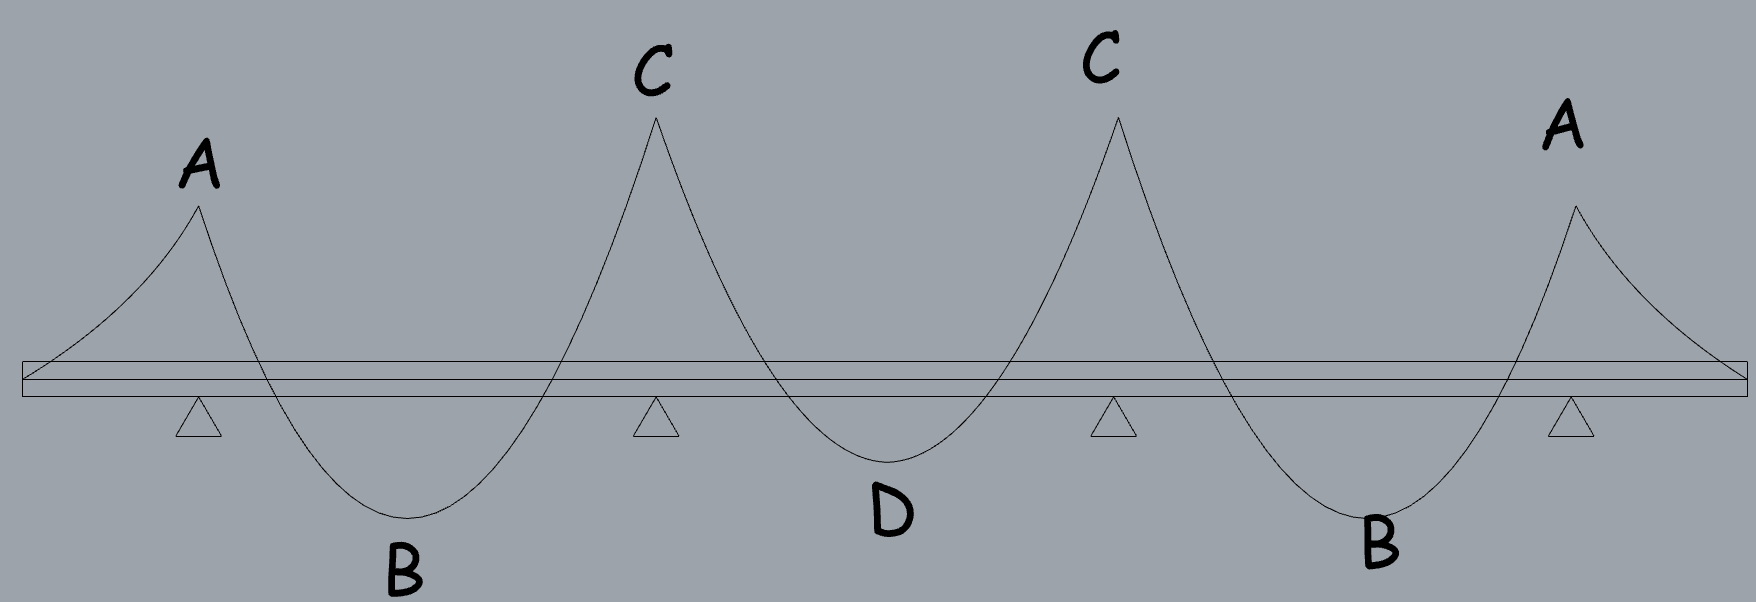

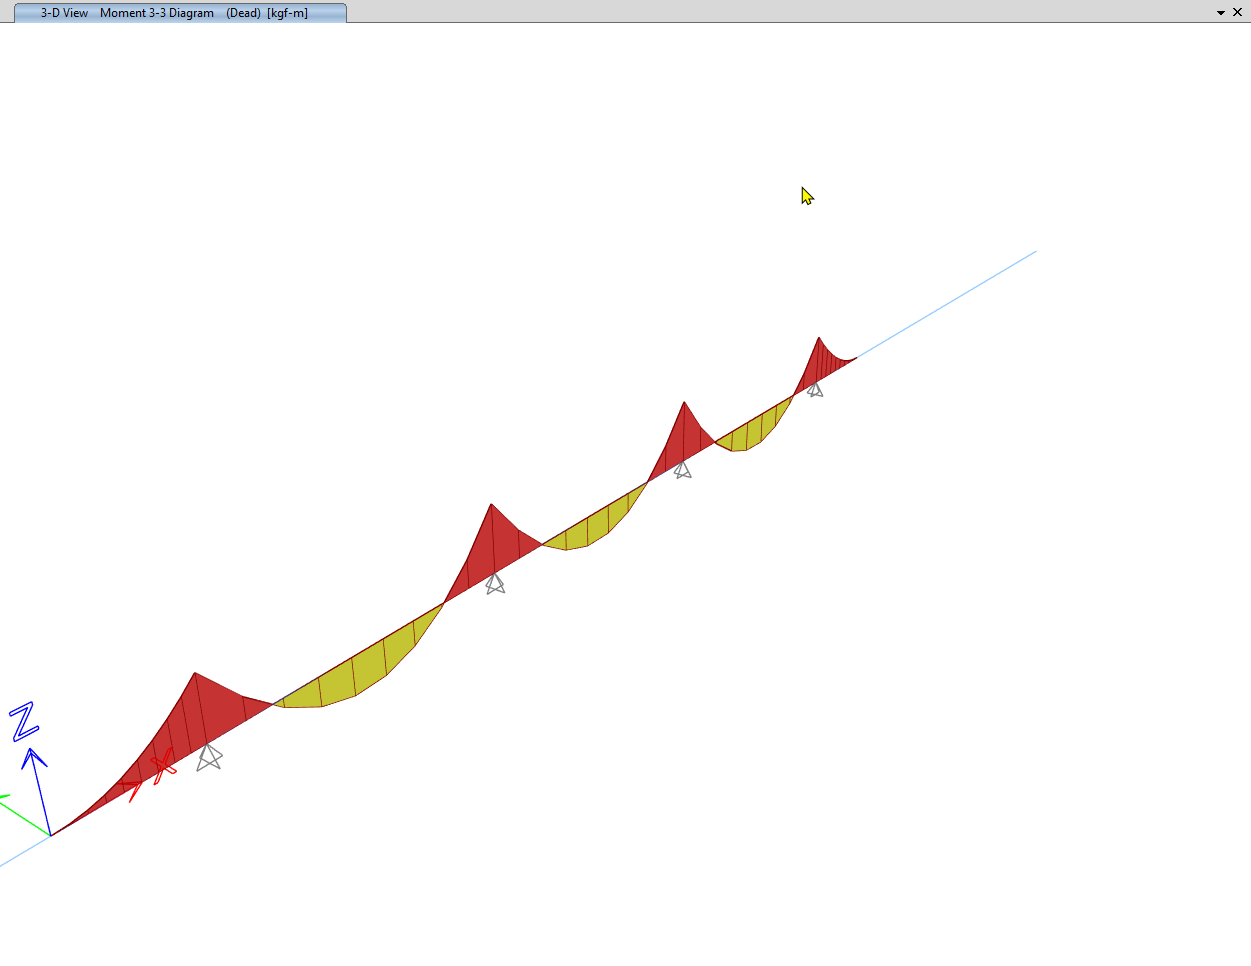

_Nota: Analisis Estructural usando el __API__ de Etabs_

In [47]:
A_1=-0.25 # Momento en A (tnf-m)
B_1=0.15 # Momento en B (tnf-m)
C_1=-0.29 # Momento en C (tnf-m)
D_1=0.13  # Momento en D (tnf-m)

_Carga DW (Carga No Estructural)_

In [48]:
w_sl_as=da*0.1*1 # 10 cm = 0.10 m de Asfalto :: 1m de Ancho de la Losa (tnf/m)
w_sl_v=dv*ev*1 # Vereda :: 1m de Ancho de la Losa (tnf/m)
w_sl_b=cb*1 # Baranda :: 1m de Ancho de la Losa (tnf/m)
print ('Asfalto = '+str(round(w_sl_as,2))+' tnf/m')
print ('Vereda = '+str(round(w_sl_v,2))+' tnf/m')
print ('Baranda = '+str(round(w_sl_b,2))+' tnf/m')

Asfalto = 0.22 tnf/m
Vereda = 0.48 tnf/m
Baranda = 0.16 tnf/m


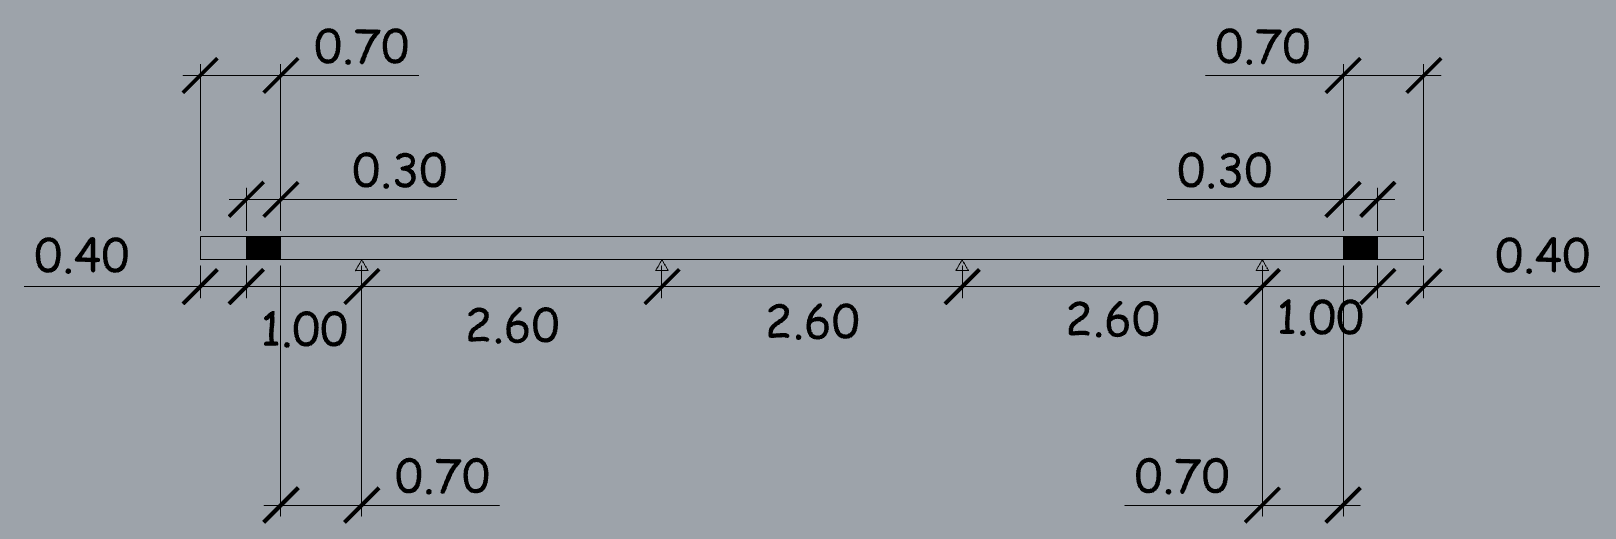

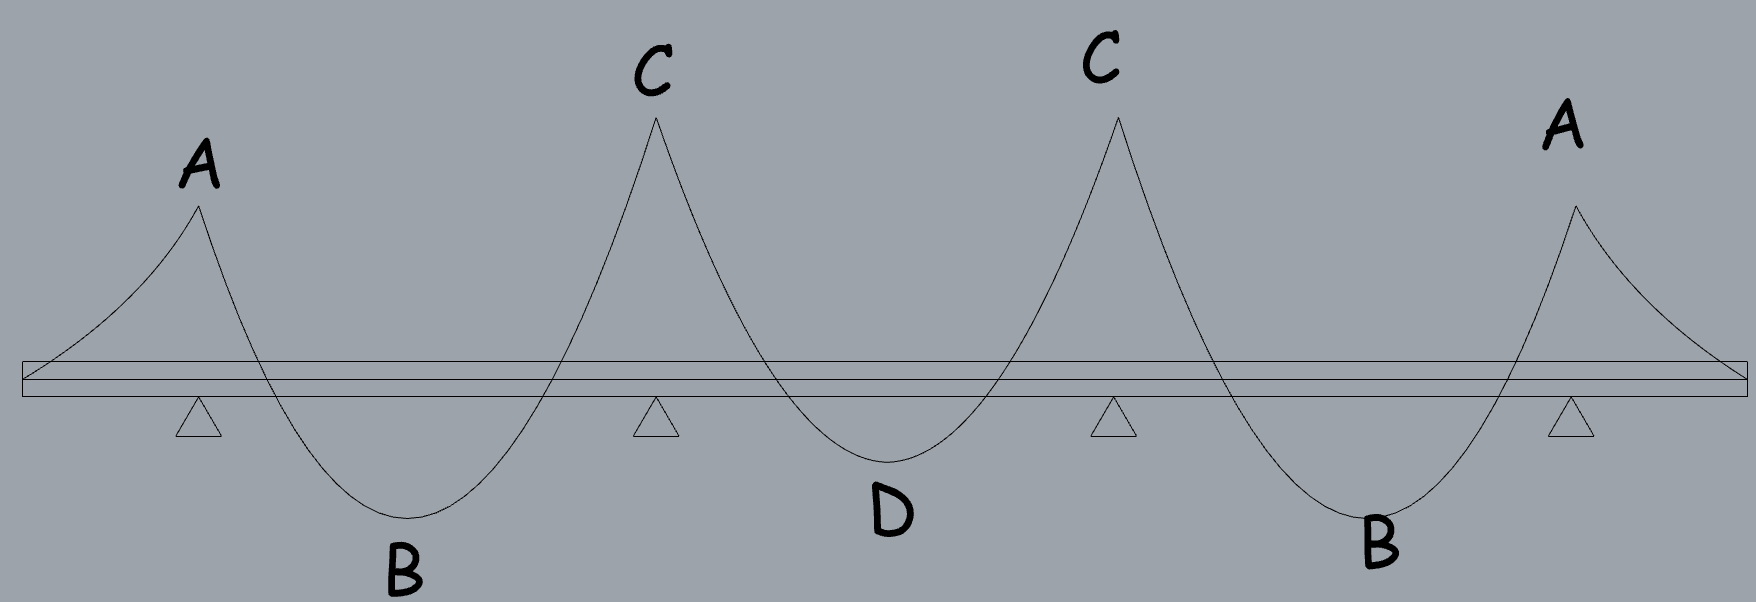

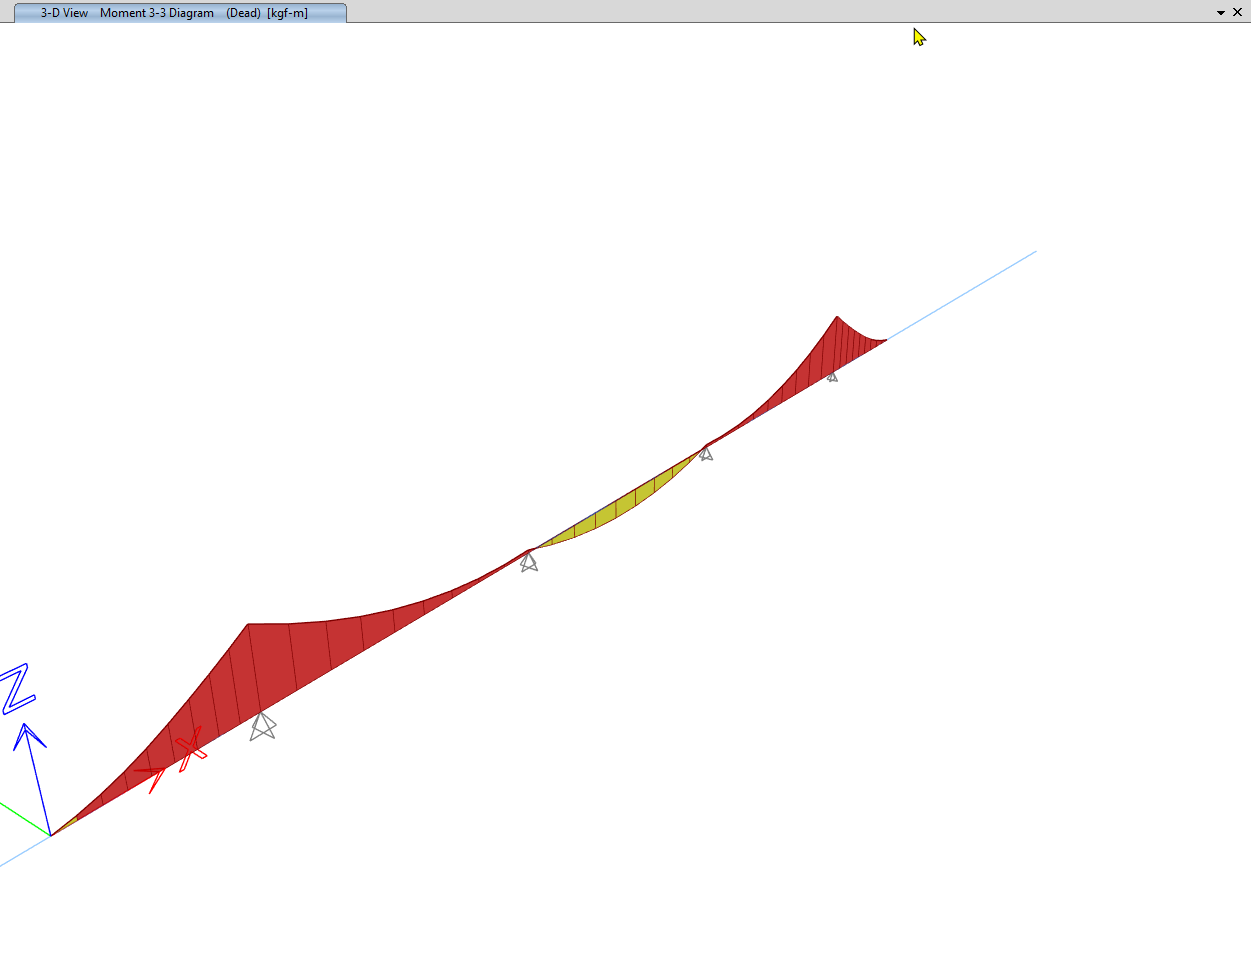

In [49]:
A_2 = -0.63  # Momento en A (tnf-m)
B_2 = -0.49  # Momento en B (tnf-m)
C_2 = -0.02  # Momento en C (tnf-m)
D_2 = 0.16  # Momento en D (tnf-m)

_Carga Peatonal_

In [50]:
w_sl_p = cp*1 #Carga Peatonal (tnf-m) 1m de Ancho de la Losa
print ('Carga Peatonal = '+str(round(w_sl_p,3))+' tnf/m')

Carga Peatonal = 0.367 tnf/m


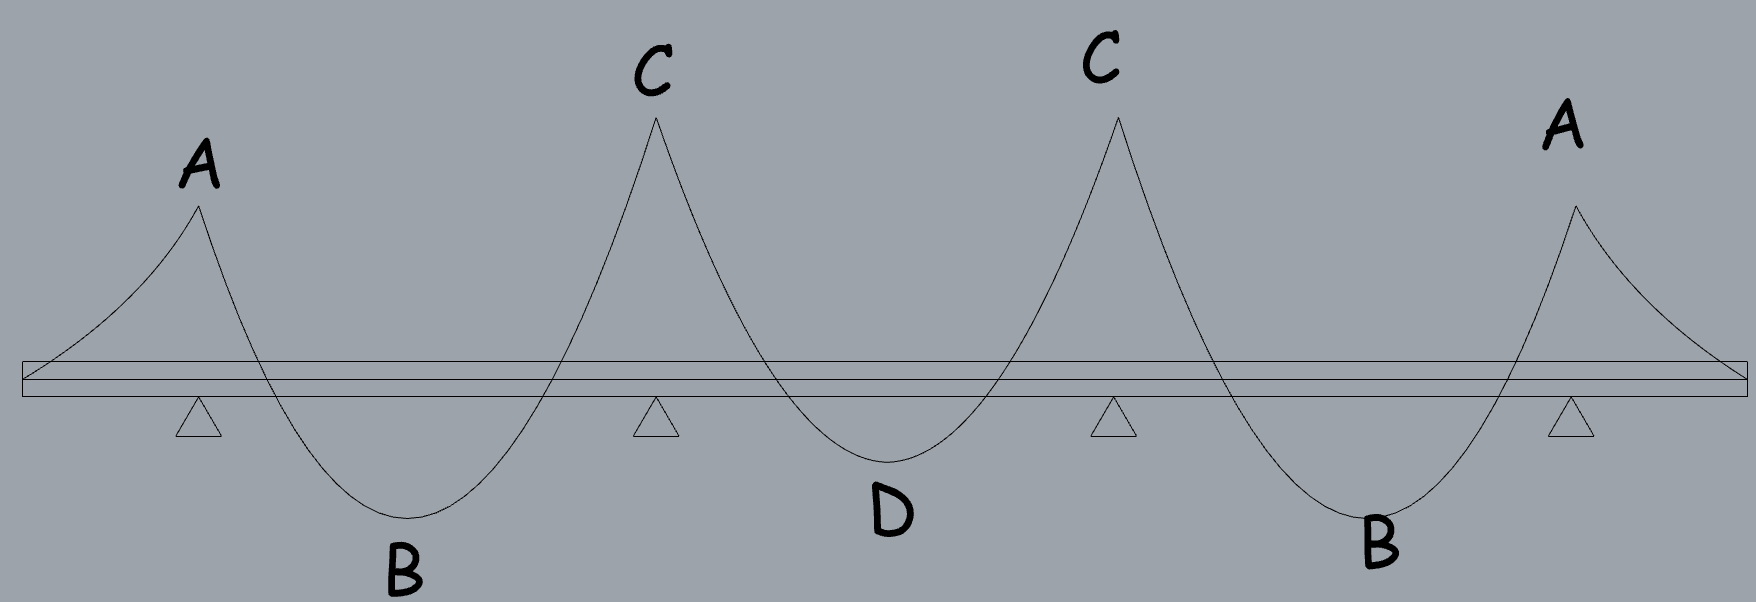

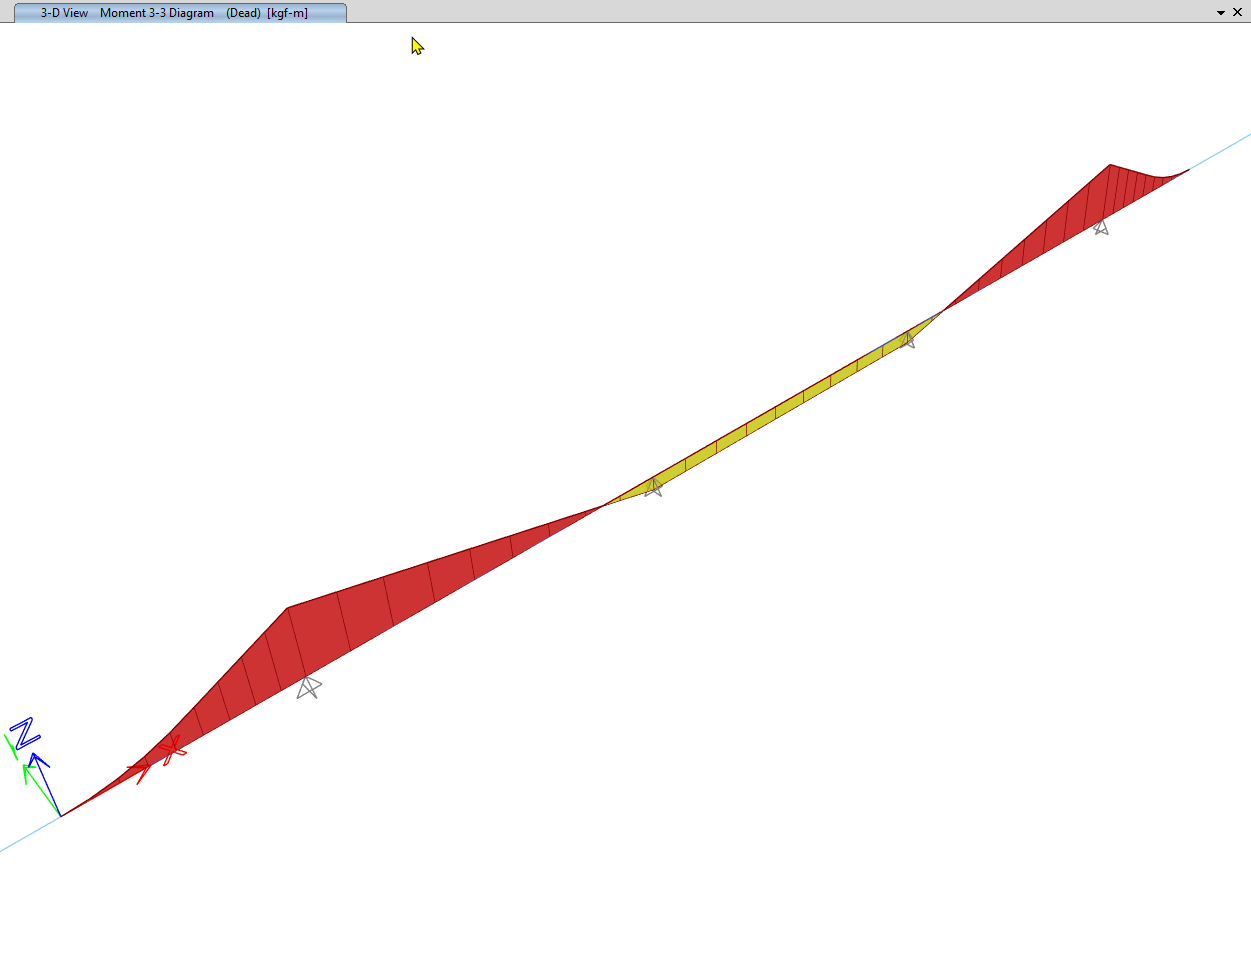

In [51]:
A_3 =-0.096  # Momento en A (tnf-m)
C_3 =0.0194 # Momento en C (tnf-m)
D_3 =0.0194  # Momento en D (tnf-m)

_Carga Viva Vehicular_

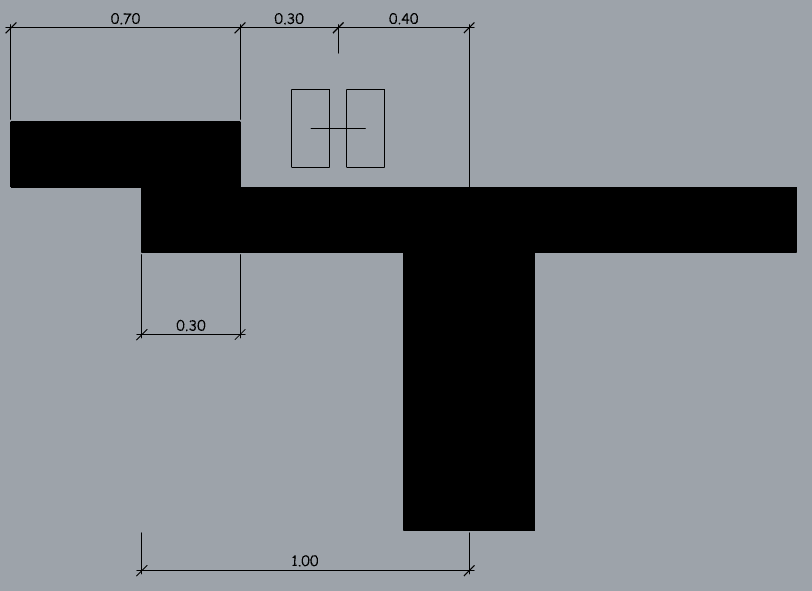

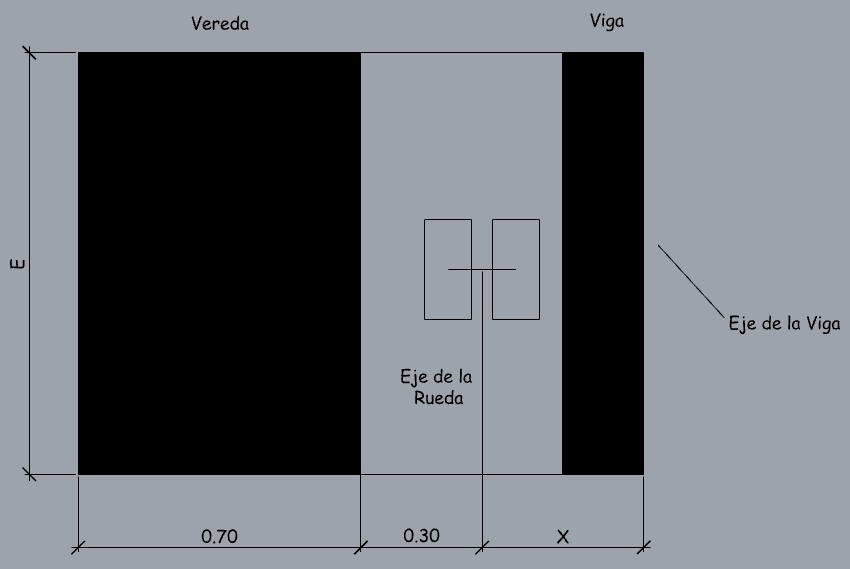

In [52]:
x=0.4  # Distancia del eje de rueda al eje de la viga (m)
E=1.14+0.833*x
print ('E='+str(round(E,2))+' m')

E=1.47 m


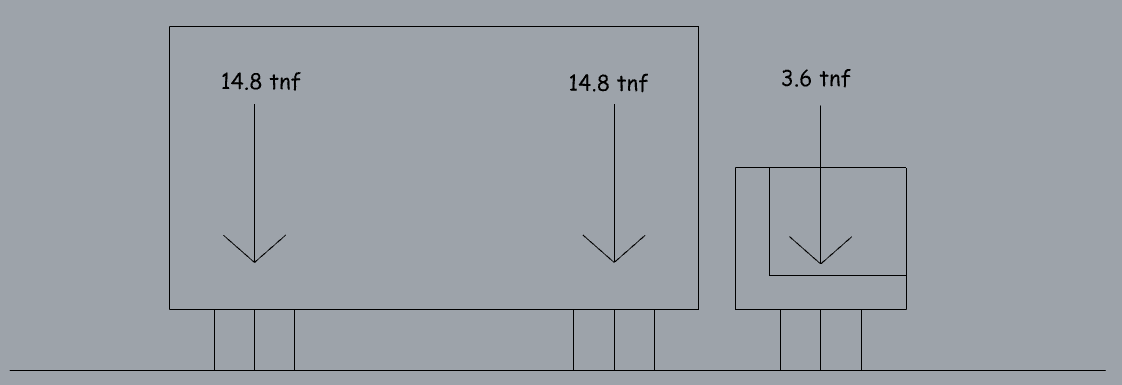

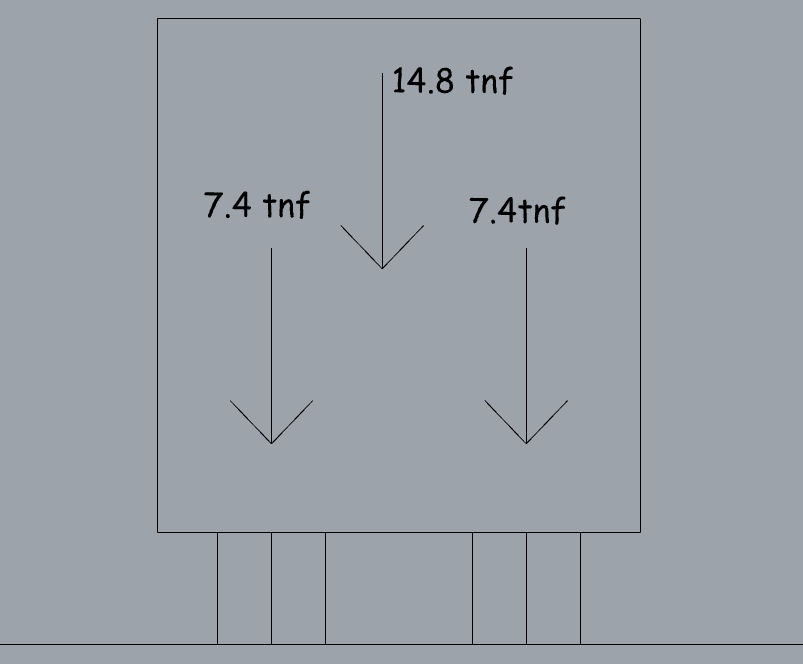

_Momento Negativo Exterior_

In [53]:
m=1.2 # Factor de Multipresencia
P=7.4 # Carga por Rueda (tnf) del Camion de Diseño
M_sl_neg_in=m*P/E*x # Momento Negativo (tnf-m)
print ('M_sl_neg_in = '+str(round(M_sl_neg_in,2))+' tnf-m')

M_sl_neg_in = 2.41 tnf-m


_Momento Negativo Interior_

In [54]:
E = 1.22+0.25*s
print ('E='+str(round(E, 2))+' m')

E=1.87 m


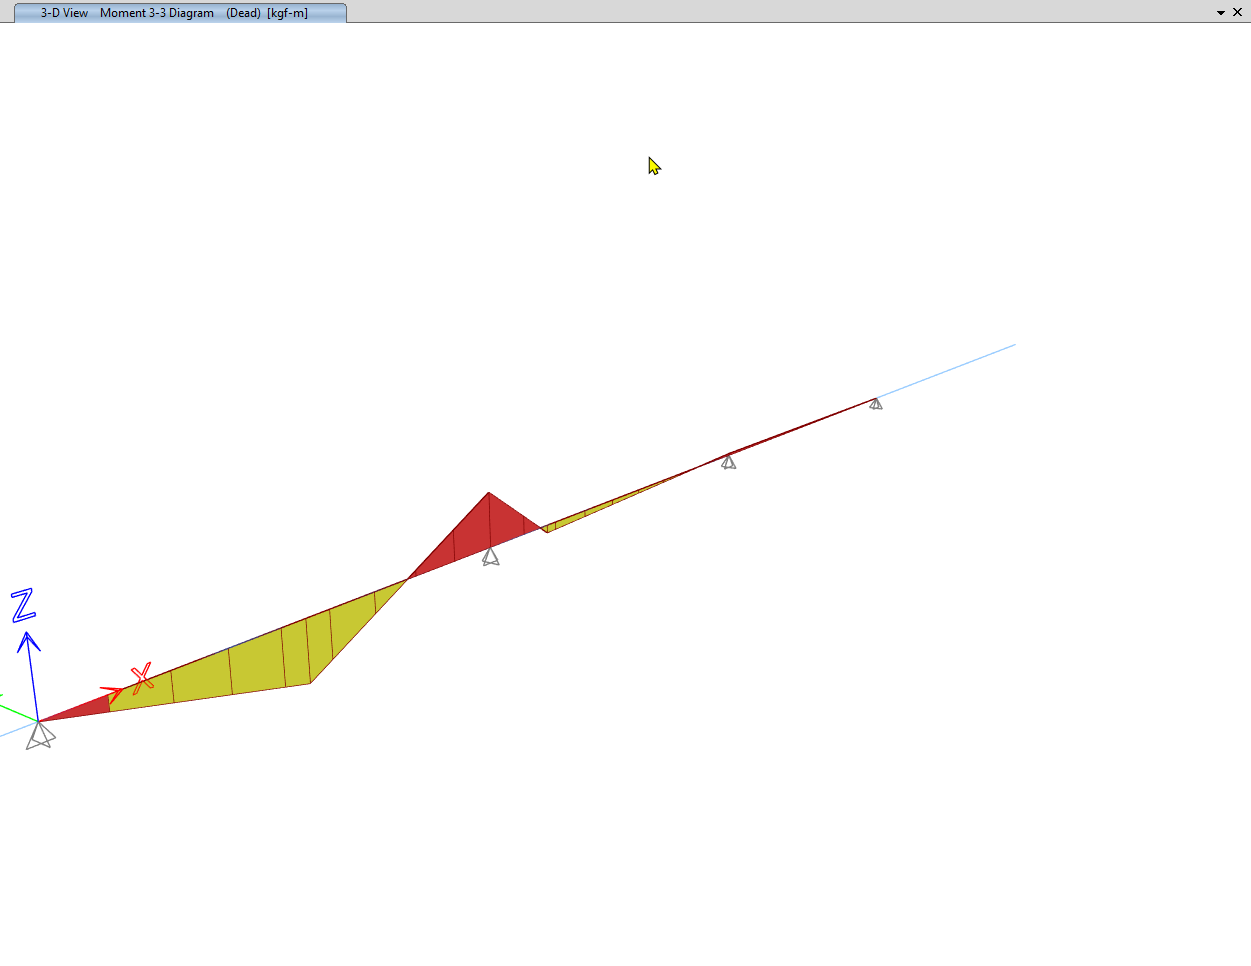

In [4]:
# Acero Adicional
from sympy import *
n = 1  # Cantidad de Barras de Acero
diam = 3/4  # Diametro de la Barra (in)
As_ad_vi = pi*(diam*2.54)**2/4  # Area de la Barra (cm2)
print ('Area As (cm2) = '+str(round(n*As_ad_vi,2))+ ' cm2 '+':: '+str(n)+ '#'+str(diam)+' (Adicional)')

Area As (cm2) = 2.85 cm2 :: 1#0.75 (Adicional)
